# Data:
## E-commerce customer segmentation and predection 
## Step 1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings

# For clustering and evaluation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# For dimensionality reduction
from sklearn.decomposition import PCA

# For interactive plots
import plotly.express as px # Using plotly.express for easier interactive plots

# Suppress warnings
warnings.filterwarnings("ignore")

# Set style for matplotlib plots
plt.style.use('fivethirtyeight')


# 2. Data preprocessing

In [2]:
data = pd.read_csv('data.csv', encoding='ISO-8859-1')

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.shape

(541909, 8)

In [5]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

* Because this is a Customer segmentation analysis, 'customerID' is crucial for analysis, with missing values in CustomerId so the other data is useless so it is better the null values


In [6]:
# droping the missing values/rows from the CustomerID 
data.dropna(axis = 0, subset = ['CustomerID'], inplace = True)
print('Dataframe dimensions:', data.shape)

Dataframe dimensions: (406829, 8)


* After dropping the missing values we have 406829 rows and 8 columns 

In [7]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
print('Duplicate Entries: {}'.format(data.duplicated().sum()))
data.drop_duplicates(inplace = True)
data_cleaned = data.copy()

Duplicate Entries: 5225


* There are 5225 duplicate values we have dropped the duplicate values.

In [9]:
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])
data_cleaned['Year'] = data_cleaned['InvoiceDate'].dt.year
data_cleaned['Month'] = data_cleaned['InvoiceDate'].dt.month
data_cleaned['Day'] = data_cleaned['InvoiceDate'].dt.day
data_cleaned['Hour'] = data_cleaned['InvoiceDate'].dt.hour


* Here we have created separate coulmns year,month,day,hour of invoicedate column

In [10]:
data_cleaned = data_cleaned[(data_cleaned['Quantity'] > 0) & (data_cleaned['UnitPrice'] > 0)]


In [11]:
# Calculate TotalPrice
data_cleaned['TotalPrice'] = data_cleaned['Quantity'] * data_cleaned['UnitPrice']


In [12]:
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,20.34


In [13]:
temp_cou = data_cleaned[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()

In [14]:
temp_cou

Empty DataFrame
Columns: []
Index: [(12346.0, 541431, United Kingdom), (12347.0, 537626, Iceland), (12347.0, 542237, Iceland), (12347.0, 549222, Iceland), (12347.0, 556201, Iceland), (12347.0, 562032, Iceland), (12347.0, 573511, Iceland), (12347.0, 581180, Iceland), (12348.0, 539318, Finland), (12348.0, 541998, Finland), (12348.0, 548955, Finland), (12348.0, 568172, Finland), (12349.0, 577609, Italy), (12350.0, 543037, Norway), (12352.0, 544156, Norway), (12352.0, 545323, Norway), (12352.0, 545332, Norway), (12352.0, 546869, Norway), (12352.0, 547390, Norway), (12352.0, 567505, Norway), (12352.0, 568699, Norway), (12352.0, 574275, Norway), (12353.0, 553900, Bahrain), (12354.0, 550911, Spain), (12355.0, 552449, Bahrain), (12356.0, 541430, Portugal), (12356.0, 549435, Portugal), (12356.0, 576895, Portugal), (12357.0, 574740, Switzerland), (12358.0, 559707, Austria), (12358.0, 581232, Austria), (12359.0, 540946, Cyprus), (12359.0, 543370, Cyprus), (12359.0, 555477, Cyprus), (12359.0, 571034, Cyprus), (12360.0, 554132, Austria), (12360.0, 563749, Austria), (12360.0, 571705, Austria), (12361.0, 545017, Belgium), (12362.0, 544203, Belgium), (12362.0, 551346, Belgium), (12362.0, 559295, Belgium), (12362.0, 563037, Belgium), (12362.0, 568651, Belgium), (12362.0, 570667, Belgium), (12362.0, 572887, Belgium), (12362.0, 573173, Belgium), (12362.0, 574329, Belgium), (12362.0, 580979, Belgium), (12363.0, 549687, Unspecified), (12363.0, 563947, Unspecified), (12364.0, 563854, Belgium), (12364.0, 567897, Belgium), (12364.0, 573401, Belgium), (12364.0, 580152, Belgium), (12365.0, 544574, Cyprus), (12365.0, 544578, Cyprus), (12367.0, 580716, Denmark), (12370.0, 538826, Cyprus), (12370.0, 539330, Austria), (12370.0, 546236, Cyprus), (12370.0, 571905, Cyprus), (12371.0, 570521, Switzerland), (12371.0, 572770, Switzerland), (12372.0, 544157, Denmark), (12372.0, 552731, Denmark), (12372.0, 568872, Denmark), (12373.0, 542887, Austria), (12374.0, 576345, Austria), (12375.0, 565333, Finland), (12375.0, 579281, Finland), (12377.0, 539488, Switzerland), (12377.0, 542586, Switzerland), (12378.0, 562046, Switzerland), (12379.0, 557789, Belgium), (12379.0, 567196, Belgium), (12380.0, 555739, Belgium), (12380.0, 567928, Belgium), (12380.0, 571187, Belgium), (12380.0, 577180, Belgium), (12381.0, 563100, Norway), (12381.0, 570681, Norway), (12381.0, 570725, Norway), (12381.0, 574694, Norway), (12381.0, 580638, Norway), (12383.0, 539840, Belgium), (12383.0, 540971, Belgium), (12383.0, 546434, Belgium), (12383.0, 550284, Belgium), (12383.0, 555928, Belgium), (12384.0, 562882, Switzerland), (12384.0, 575734, Switzerland), (12386.0, 537676, Australia), (12386.0, 540280, Australia), (12388.0, 541271, Australia), (12388.0, 543357, Australia), (12388.0, 546135, Australia), (12388.0, 560033, Australia), (12388.0, 568145, Australia), (12388.0, 578459, Australia), ...]

[18532 rows x 0 columns]

* Here we have grouped the CustomerID,Invoice,country to know how many invoice are their related to each CustomerID

In [15]:
temp_cou = temp_cou.reset_index(drop = False)

In [16]:
countries = temp_cou['Country'].value_counts()
print('No. of countries in the dataframe: {}'.format(len(countries)))

No. of countries in the dataframe: 37


 * Here we have taken count of the number of unique countries

In [17]:
countries.index

Index(['United Kingdom', 'Germany', 'France', 'EIRE', 'Belgium', 'Netherlands',
       'Spain', 'Portugal', 'Australia', 'Switzerland', 'Finland', 'Italy',
       'Norway', 'Sweden', 'Channel Islands', 'Japan', 'Poland', 'Denmark',
       'Austria', 'Cyprus', 'Unspecified', 'Iceland', 'Singapore', 'Canada',
       'Greece', 'USA', 'Israel', 'Malta', 'European Community', 'Lithuania',
       'United Arab Emirates', 'Czech Republic', 'Bahrain', 'Saudi Arabia',
       'Lebanon', 'Brazil', 'RSA'],
      dtype='object', name='Country')

In [18]:
countries

Country
United Kingdom          16646
Germany                   457
France                    389
EIRE                      260
Belgium                    98
Netherlands                94
Spain                      90
Portugal                   57
Australia                  57
Switzerland                51
Finland                    41
Italy                      38
Norway                     36
Sweden                     36
Channel Islands            26
Japan                      19
Poland                     19
Denmark                    18
Austria                    17
Cyprus                     16
Unspecified                 8
Iceland                     7
Singapore                   7
Canada                      6
Greece                      5
USA                         5
Israel                      5
Malta                       5
European Community          4
Lithuania                   4
United Arab Emirates        3
Czech Republic              2
Bahrain                     2
Sa

In [19]:
len(data_cleaned['CustomerID'].value_counts())

4338

In [20]:
pd.DataFrame([{'products': len(data_cleaned['StockCode'].value_counts()),
               'transactions': len(data_cleaned['InvoiceNo'].value_counts()),
               'customers': len(data_cleaned['CustomerID'].value_counts()),}],
             columns = ['products', 'transactions', 'customers'], index = ['quantity'])

,products,transactions,customers
quantity,3665,18532,4338


In [21]:

temp_pro = data_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()

# Rename the InvoiceDate to number of products
products_per_cart = temp_pro.rename(columns = {'InvoiceDate':'Number of products'})

# Sort in Ascending order based on CustomerID
products_per_cart[:10].sort_values('CustomerID') # List first 10 values

,CustomerID,InvoiceNo,Number of products
0,12346.0,541431,1
1,12347.0,537626,31
2,12347.0,542237,29
3,12347.0,549222,24
4,12347.0,556201,18
5,12347.0,562032,22
6,12347.0,573511,47
7,12347.0,581180,11
8,12348.0,539318,17
9,12348.0,541998,6


 * Here we have renamed the InvoiceDate to number of products and sorted the customerid in accending order


In [22]:
# sum of purchases / user & order
temp_sum = data_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['TotalPrice'].sum()
cart_price = temp_sum.rename(columns = {'TotalPrice':'cart Price'})

# date of the order
data_cleaned['InvoiceDate_int'] = data_cleaned['InvoiceDate'].astype('int64')
temp_date = data_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate_int'].mean()
data_cleaned.drop('InvoiceDate_int', axis = 1, inplace = True)
cart_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp_date['InvoiceDate_int'])

# selection of significant entries:
cart_price = cart_price[cart_price['cart Price'] > 0] 
cart_price.sort_values('CustomerID')[:6] 

,CustomerID,InvoiceNo,cart Price,InvoiceDate
0,12346.0,541431,77183.60,2011-01-18 10:01:00.000000000
1,12347.0,537626,711.79,2010-12-07 14:57:00.000000000
2,12347.0,542237,475.39,2011-01-26 14:29:59.999999744
3,12347.0,549222,636.25,2011-04-07 10:43:00.000000000
4,12347.0,556201,382.52,2011-06-09 13:01:00.000000000
5,12347.0,562032,584.91,2011-08-02 08:48:00.000000000


* Here we have created a column named cart price by total purchase made by each customer according to the invoiceno

In [23]:
cart_price.max(), cart_price.min()

(CustomerID                 18287.0
 InvoiceNo                   581587
 cart Price                168469.6
 InvoiceDate    2011-12-09 12:50:00
 dtype: object,
 CustomerID                 12346.0
 InvoiceNo                   536365
 cart Price                    0.38
 InvoiceDate    2010-12-01 08:26:00
 dtype: object)

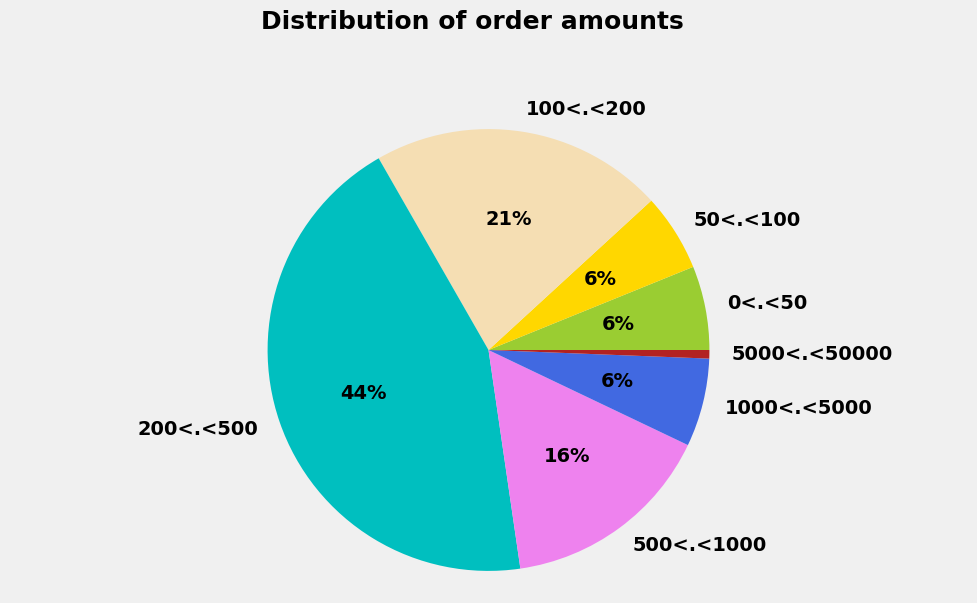

In [24]:
# Purchase count
price_range = [0, 50, 100, 200, 500, 1000, 5000, 50000]

count_price = []

for i, price in enumerate(price_range):
    if i == 0: continue
    # Use cart_price instead of basket_price for filtering
    val = cart_price[(cart_price['cart Price'] < price) &
                       (cart_price['cart Price'] > price_range[i-1])]['cart Price'].count()
    count_price.append(val)



# Representation of the number of purchases / amount
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
labels = [ '{}<.<{}'.format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
sizes  = count_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
ax.pie(sizes, explode = explode, labels=labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle=0)
ax.axis('equal')
f.text(0.5, 1.01, "Distribution of order amounts", ha='center', fontsize = 18);

* This piechart describes the percentage of amounts ranges in different catorgies that defines values of customer and spending of the customer
* There is 44% spending under range of 200-500 dollars
* And 21% under 50-100 dollars
* 16% under 500-1000, that means most of the customers spendings would under 50$-1000$ dollars.


# 3. Customer Segmentation

## Calculating Recency:
* Here we are calculating recency for customers

In [25]:
# Ensure the InvoiceDate column is in datetime format
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])

# Get the most recent date in the dataset
recent_date = data_cleaned['InvoiceDate'].max()

# Group by CustomerID and calculate the LastPurchaseDate and Recency
df_recency = (
    data_cleaned.groupby('CustomerID', as_index=False)['InvoiceDate']
    .max()
    .rename(columns={'InvoiceDate': 'LastPurchaseDate'})
)
df_recency['Recency'] = (recent_date - df_recency['LastPurchaseDate']).dt.days

df_recency.head()


,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18 10:01:00,325
1,12347.0,2011-12-07 15:52:00,1
2,12348.0,2011-09-25 13:13:00,74
3,12349.0,2011-11-21 09:51:00,18
4,12350.0,2011-02-02 16:01:00,309


* Recency descreibes how recently has the customer made a transaction

# Calculating Frequency:
* Here We are here calculating the frequency 

In [26]:
frequency_df = data_cleaned.groupby('CustomerID', as_index=False)['InvoiceDate'].nunique().rename(columns={'InvoiceDate': 'Frequency'})
frequency_df.head()



,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1


* frequency describes how frequent the customer making the transaction with their orderings

# Calculating Monetary Value:
*Here we are calculating the monetary value of customer



In [27]:
# Calculate TotalPrice
data_cleaned['TotalPrice'] = data_cleaned['Quantity'] * data_cleaned['UnitPrice']
monetary_df = data_cleaned.groupby(by='CustomerID', as_index=False)['TotalPrice'].sum()
monetary_df.columns = ['CustomerID', 'Monetary']
monetary_df.head()


,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


* Monetary how much does the customer spend on purchasing

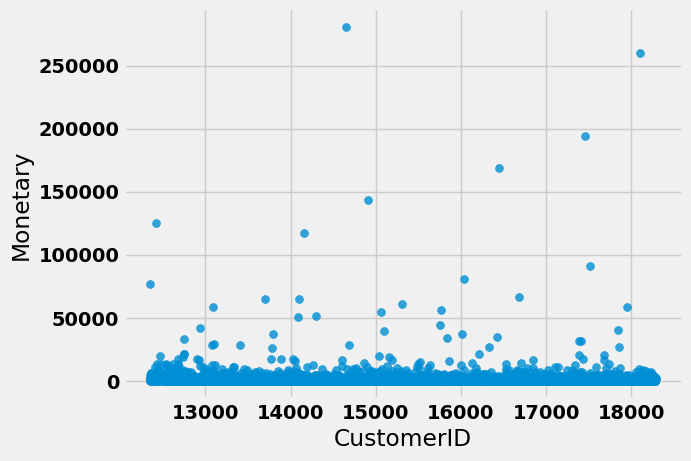

In [28]:
from matplotlib import pyplot as plt
monetary_df.plot(kind='scatter', x='CustomerID', y='Monetary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

* Above scatter plot describes the montery value of the customers based on their represented ID's

# Merging all three columns in one dataframe:
* Here we are merging all the dataframe columns in a single entity using the merge function to display the recency, frequency, monetary value.

In [29]:
# Calculate Recency
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])  # Ensure datetime format
recent_date = data_cleaned['InvoiceDate'].max()
df_recency = data_cleaned.groupby('CustomerID', as_index=False)['InvoiceDate'].max().rename(columns={'InvoiceDate': 'LastPurchaseDate'})
df_recency['Recency'] = (recent_date - df_recency['LastPurchaseDate']).dt.days

# Calculate Frequency
frequency_df = data_cleaned.groupby('CustomerID', as_index=False)['InvoiceDate'].nunique().rename(columns={'InvoiceDate': 'Frequency'})

# Calculate Monetary
data_cleaned['TotalPrice'] = data_cleaned['Quantity'] * data_cleaned['UnitPrice']
monetary_df = data_cleaned.groupby('CustomerID', as_index=False)['TotalPrice'].sum().rename(columns={'TotalPrice': 'Monetary'})

# Merge Recency, Frequency, and Monetary
rfm_df = df_recency[['CustomerID', 'Recency']].merge(frequency_df, on='CustomerID').merge(monetary_df, on='CustomerID')

rfm_df.head()



,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40


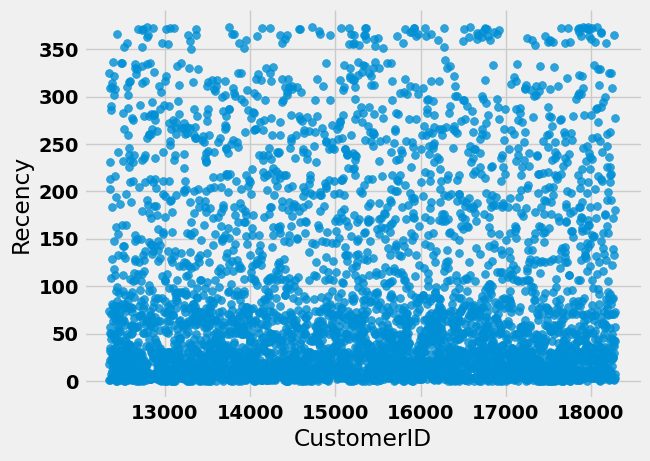

In [30]:
from matplotlib import pyplot as plt
rfm_df.plot(kind='scatter', x='CustomerID', y='Recency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

* Above scatter plot describes the recency of the customer 

# Ranking Customer’s based upon their recency, frequency, and monetary score:
* Here we are normalizing the rank of the customers within a company to analyze the ranking.

In [31]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)

# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100

rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

rfm_df.head()


,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,12346.0,325,1,77183.60,3.751165,17.242969,17.242969
1,12347.0,1,7,4310.00,97.914725,85.580913,85.580913
2,12348.0,74,4,1797.24,38.513514,69.893960,69.893960
3,12349.0,18,1,1757.55,74.137931,17.242969,17.242969
4,12350.0,309,1,334.40,5.370457,17.242969,17.242969


# Calculating RFM score:
* RFM score is calculated based upon recency, frequency, monetary value normalize ranks. Based upon this score we divide our customers.

In [32]:
rfm_df['RFM_Score'] = 0.0075 * rfm_df['R_rank_norm'] + 0.014 * rfm_df['F_rank_norm'] + 0.0285 * rfm_df['M_rank_norm']
rfm_df = rfm_df.round(2)
rfm_df[['CustomerID', 'RFM_Score']].head(7)

,CustomerID,RFM_Score
0,12346.0,0.76
1,12347.0,4.37
2,12348.0,3.26
3,12349.0,1.29
4,12350.0,0.77
5,12352.0,4.19
6,12353.0,0.86


# Rating Customer based upon the RFM score:

In [33]:
bins = [0, 1.6, 3, 4, 4.5, float('inf')]
labels = ['Lost Customers', 'Low Value Customers', 'Medium Value Customer', 'High Value Customer', 'Top Customers']
rfm_df['Customer_segment'] = pd.cut(rfm_df['RFM_Score'], bins=bins, labels=labels, right=False)
rfm_df[['CustomerID', 'RFM_Score', 'Customer_segment']].head(20)



,CustomerID,RFM_Score,Customer_segment
0,12346.0,0.76,Lost Customers
1,12347.0,4.37,High Value Customer
2,12348.0,3.26,Medium Value Customer
3,12349.0,1.29,Lost Customers
4,12350.0,0.77,Lost Customers
5,12352.0,4.19,High Value Customer
6,12353.0,0.86,Lost Customers
7,12354.0,0.84,Lost Customers
8,12355.0,0.85,Lost Customers
9,12356.0,3.05,Medium Value Customer


#  Pairwise Plots (RFM Features)
* To check distribution and interactions between Recency, Frequency, and Monetary.

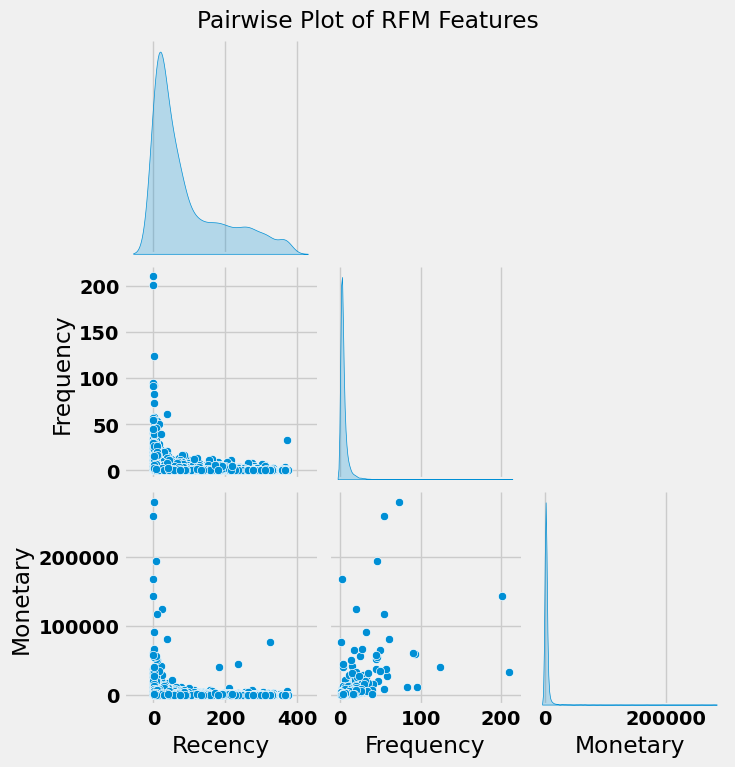

In [34]:
sns.pairplot(rfm_df[['Recency', 'Frequency', 'Monetary']], diag_kind='kde', corner=True)
plt.suptitle("Pairwise Plot of RFM Features", y=1.02)
plt.show()

* Helps detect patterns and clusters in customer behavior

# 4. Exploratory Data Analysis (EDA)

# Visualizing the customer segments:

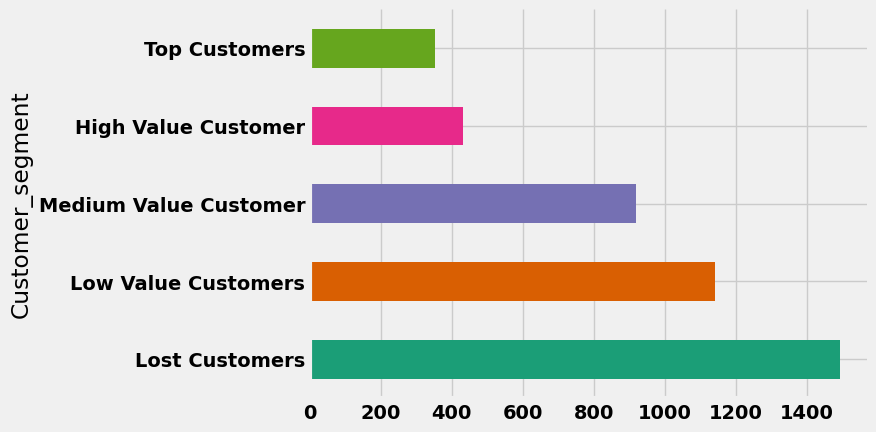

In [35]:

rfm_df.groupby('Customer_segment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)


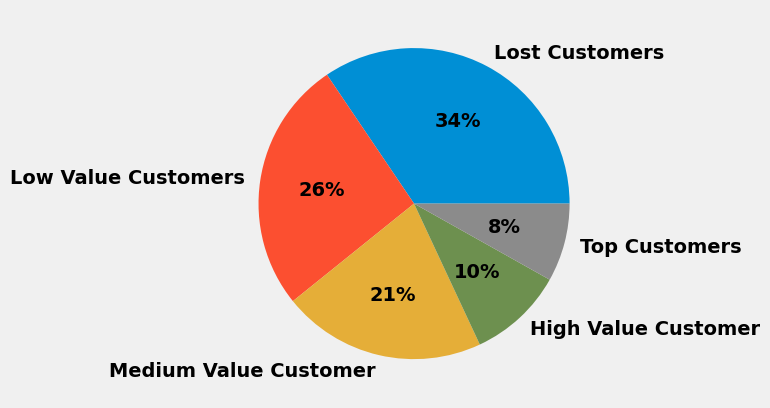

In [36]:
plt.pie(rfm_df.Customer_segment.value_counts(),labels=rfm_df.Customer_segment.value_counts().index,autopct='%.0f%%')
plt.show()



* Above pie plot displays all segments of customers.
* we have 34% lost customers that means these customers are mostly who did single time transactions.
* we have 26% low value customers which represents their monetary value is low.
* we have 21% medium value customers which represents they are frequently purchasing but they have medium monetary value. 
* we have 10% high value customers which represents they are most frquently purchasing and their monetary value is high.
* And at last we have 8% high value customers who monetary is very high

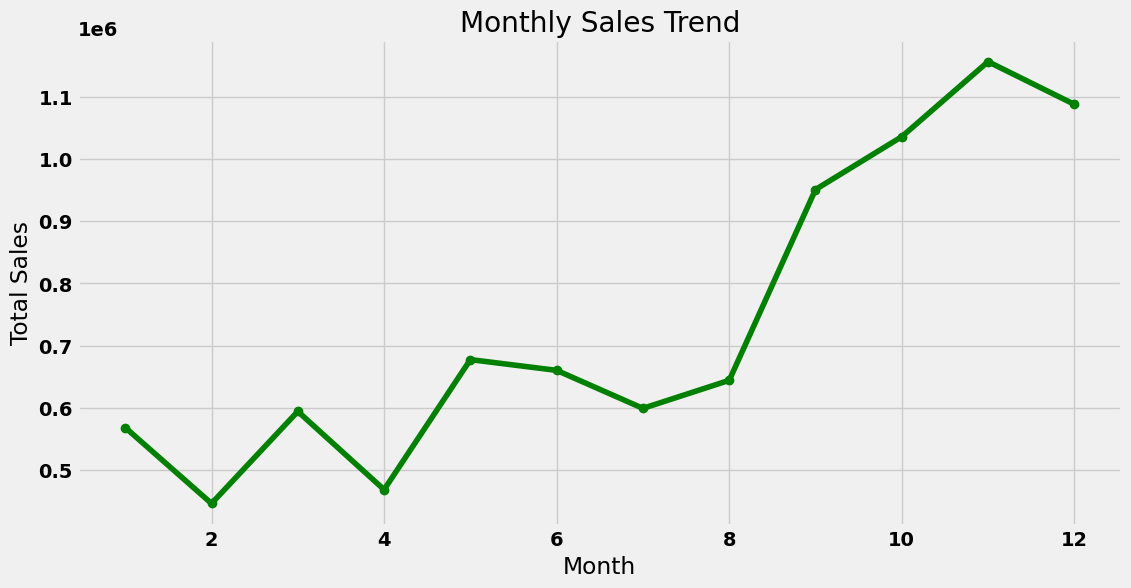

In [37]:
# Monthly sales
monthly_sales = data_cleaned.groupby('Month')['TotalPrice'].sum()
plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

* In the above graph we can see the sales trend of each month 
* until 8th month there is no increase in the trend but after 8th month we can observe rapid increase in the trend
* That describes that the purchases are very high in the ending 3 months.

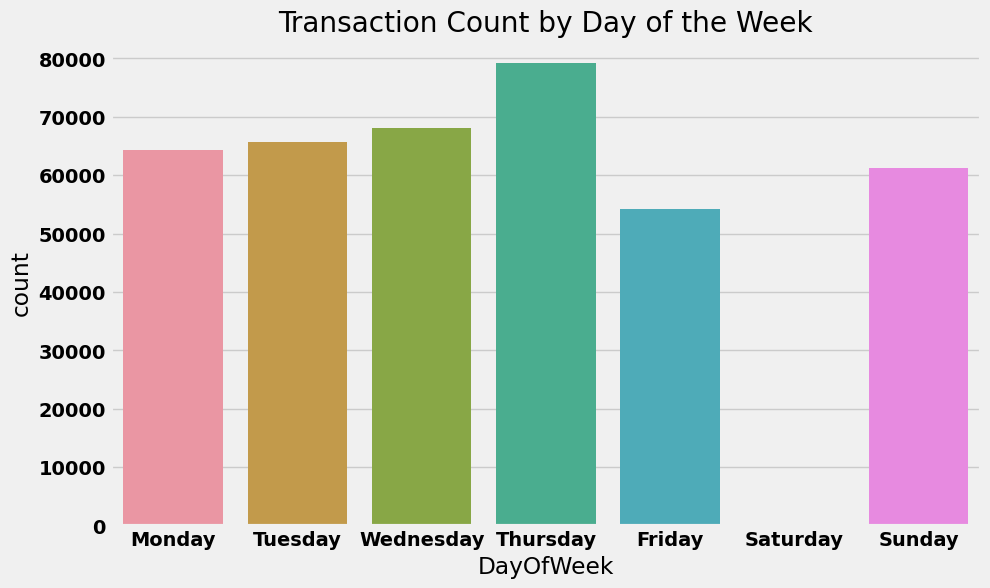

In [38]:
# Day of week analysis
data_cleaned['DayOfWeek'] = data_cleaned['InvoiceDate'].dt.day_name()
plt.figure(figsize=(10, 6))
sns.countplot(data=data_cleaned, x='DayOfWeek', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title("Transaction Count by Day of the Week")
plt.show()

* In the plot we can see the transaction count by days within the week 
* there are highest transactions on thursday and least transactions on saturday


Top 10 products by revenue:
 Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142264.75
WHITE HANGING HEART T-LIGHT HOLDER    100392.10
JUMBO BAG RED RETROSPOT                85040.54
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68785.23
ASSORTED COLOUR BIRD ORNAMENT          56413.03
Manual                                 53419.93
RABBIT NIGHT LIGHT                     51251.24
Name: TotalPrice, dtype: float64


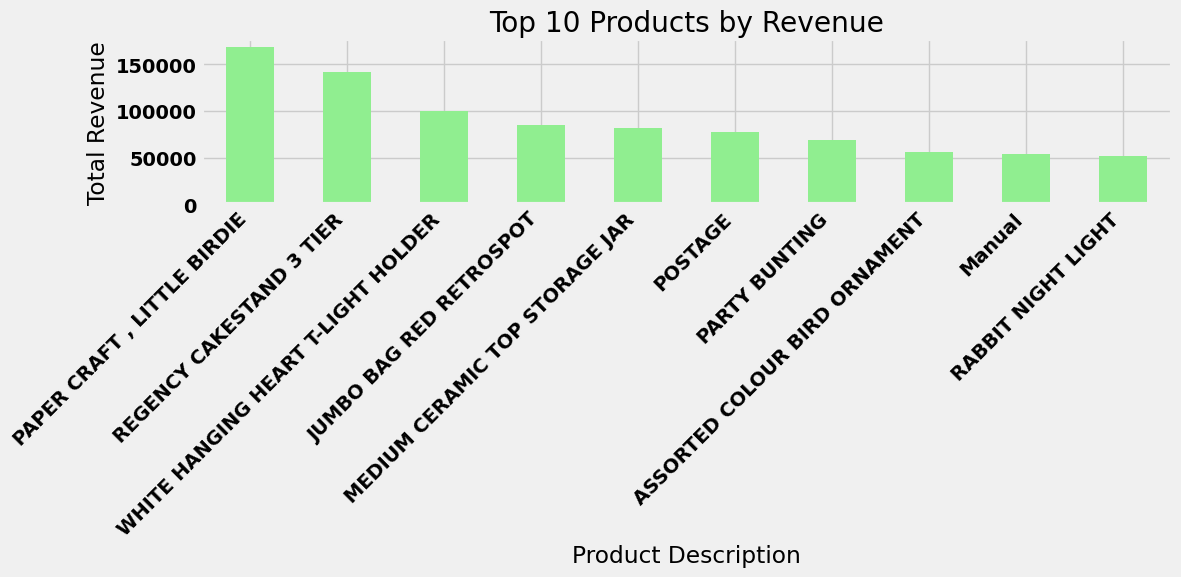

In [39]:

# Calculate and plot top 10 products by revenue
product_revenue = data_cleaned.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False)
top_revenue_products = product_revenue.head(10)
print("\nTop 10 products by revenue:\n", top_revenue_products)

# Plot top 10 products by revenue
plt.figure(figsize=(12, 6))
top_revenue_products.plot(kind='bar', color='lightgreen')
plt.title("Top 10 Products by Revenue")
plt.xlabel("Product Description")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

* Above plot describes the top 10 selling by revenue

#  Detecting and Handle Outliers
* Since our dataset involves transactions, outliers can skew analysis.

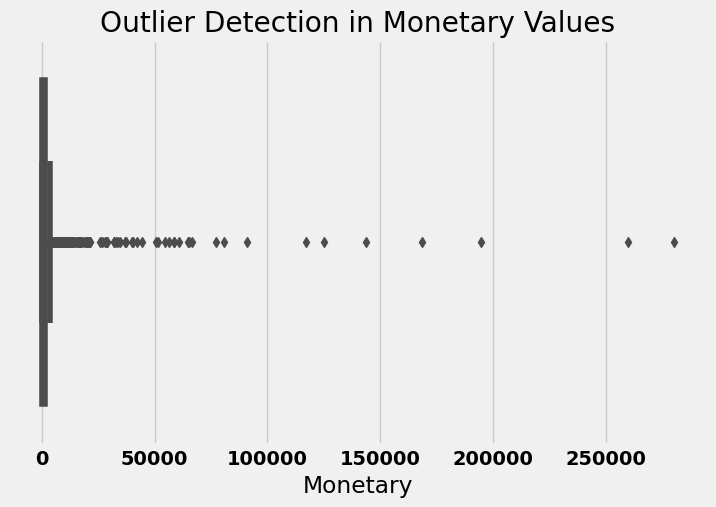

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to check outliers in Monetary values
plt.figure(figsize=(8, 5))
sns.boxplot(x=rfm_df['Monetary'], color='red')
plt.title('Outlier Detection in Monetary Values')
plt.show()


In [41]:
# Removing extreme outliers (e.g., customers who spent 99th percentile amount)
upper_limit = rfm_df['Monetary'].quantile(0.99)
rfm_df = rfm_df[rfm_df['Monetary'] < upper_limit]


# Customer Behavior Over Time
 * customer purchases change by time of day.

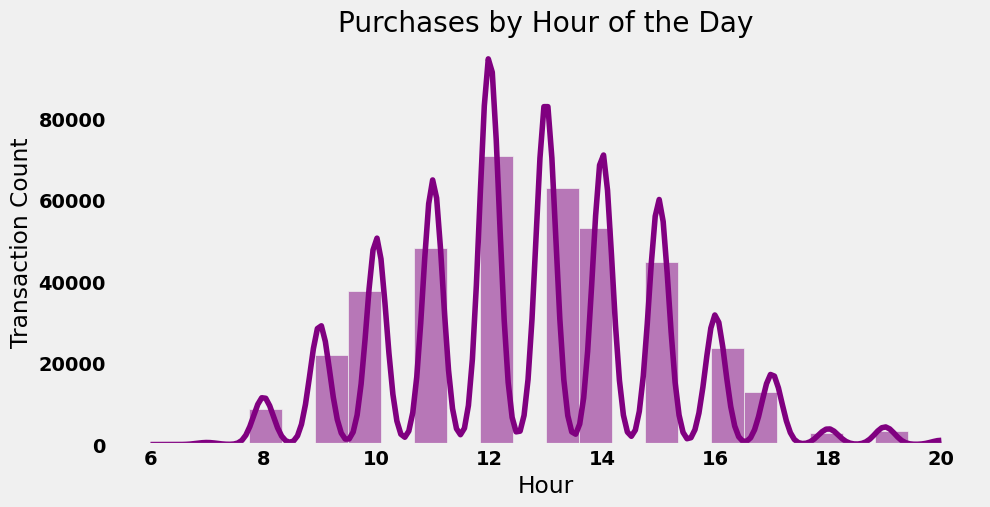

In [42]:
plt.figure(figsize=(10, 5))
sns.histplot(data_cleaned['Hour'], bins=24, kde=True, color='purple')
plt.title("Purchases by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Transaction Count")
plt.grid()
plt.show()


# Valuable Customers by Country
* top 10 countries by revenue.

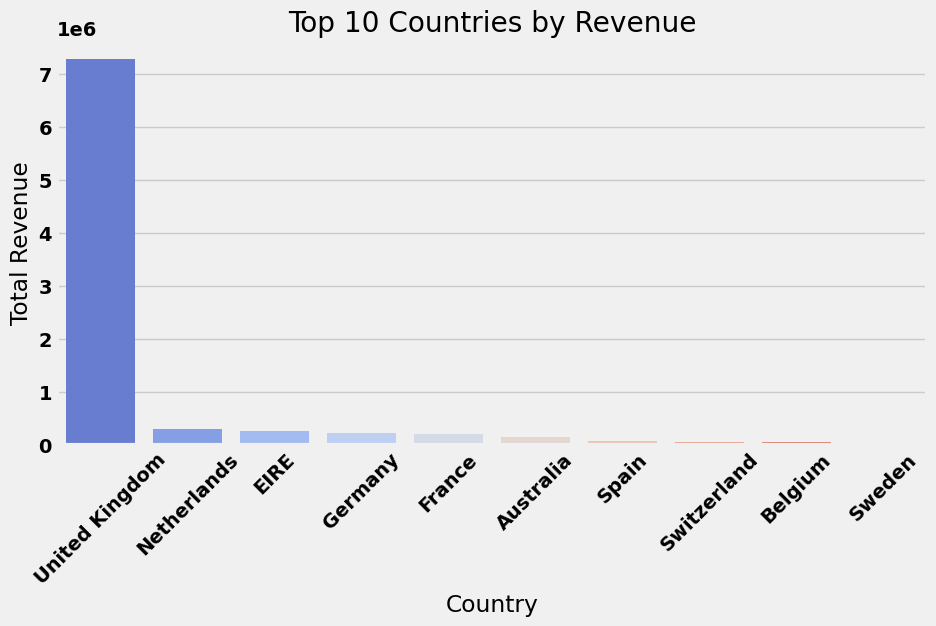

In [43]:
top_countries = data_cleaned.groupby("Country")["TotalPrice"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="coolwarm")
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()


# Customer Churn Analysis
* Check inactive customers (e.g., no purchase in the last 6 months).

In [44]:
from datetime import datetime, timedelta

# Define cutoff date (6 months before the most recent transaction)
cutoff_date = recent_date - timedelta(days=180)

# Count inactive customers
inactive_customers = rfm_df[rfm_df['Recency'] > 180].shape[0]

print(f"Number of inactive customers: {inactive_customers}")


Number of inactive customers: 855


#  Customer Purchase Heatmap
* To See purchasing behavior by Day of the Week & Hour of the Day.

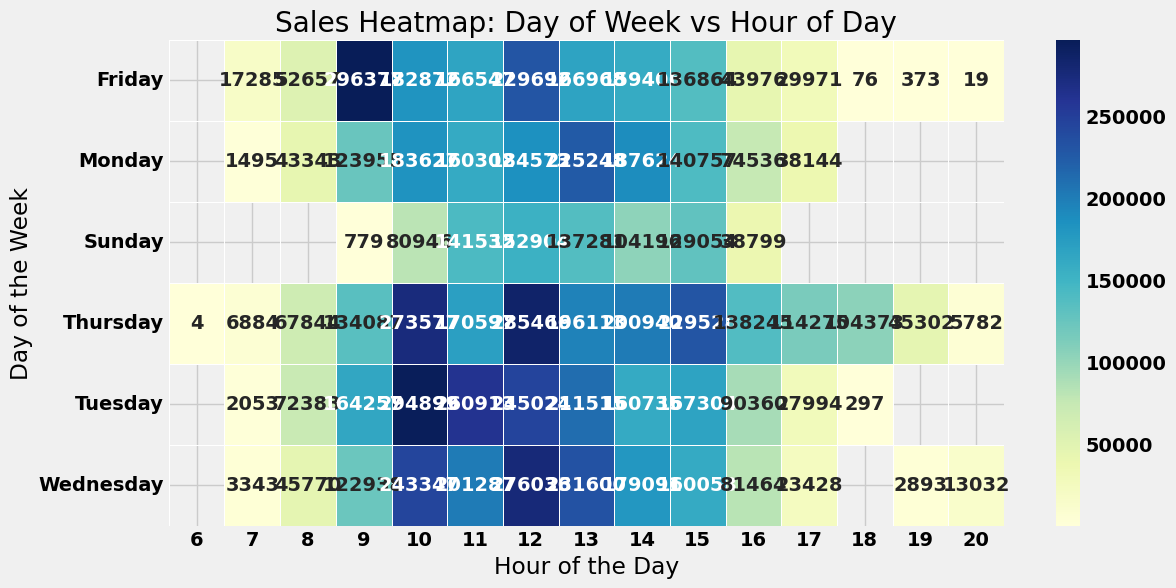

In [45]:
import pandas as pd

# Create a pivot table for heatmap
heatmap_data = data_cleaned.pivot_table(index=data_cleaned['DayOfWeek'], 
                                        columns=data_cleaned['Hour'], 
                                        values='TotalPrice', aggfunc='sum')

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5, annot=True, fmt=".0f")
plt.title('Sales Heatmap: Day of Week vs Hour of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()


* Dark areas → High sales activity.
* Light areas → Low sales activity.

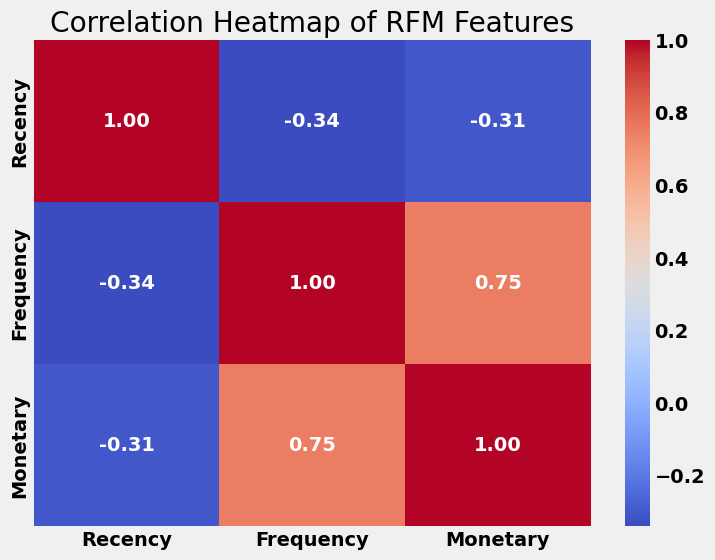

In [46]:
plt.figure(figsize=(8, 6))
sns.heatmap(rfm_df[['Recency', 'Frequency', 'Monetary']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of RFM Features')
plt.show()

* Above plot describes the correlation of rfm features


# Importing standardscaler:
* Here we have standardized Recency, Frequency, and Monetary

In [47]:
from sklearn.preprocessing import StandardScaler

# Standardize Recency, Frequency, and Monetary
rfm_df[['Recency', 'Frequency', 'Monetary']] = StandardScaler().fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])

rfm_df.head()


,CustomerID,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score,Customer_segment
1,12347.0,-0.911671,0.643960,1.379859,97.91,85.58,85.58,4.37,High Value Customer
2,12348.0,-0.182194,0.029388,0.185865,38.51,69.89,69.89,3.26,Medium Value Customer
3,12349.0,-0.741793,-0.585184,0.167005,74.14,17.24,17.24,1.29,Lost Customers
4,12350.0,2.166123,-0.585184,-0.509236,5.37,17.24,17.24,0.77,Lost Customers
5,12352.0,-0.571914,0.848817,0.522667,58.66,88.30,88.30,4.19,High Value Customer


# K-Means clustering:
* Applying k-means clustering

In [48]:
from sklearn.cluster import KMeans

# Apply KMeans clustering and assign cluster labels
rfm_df['Cluster'] = KMeans(n_clusters=5, random_state=42).fit_predict(rfm_df[['Recency', 'Frequency', 'Monetary']])

# Analyze clusters
print(rfm_df.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean())


          Recency  Frequency  Monetary
Cluster                               
0        1.598222  -0.485896 -0.462158
1       -0.630579   0.589740  0.537752
2       -0.408345  -0.336684 -0.360904
3       -0.863227   5.288878  5.654621
4       -0.715115   2.182219  2.429266


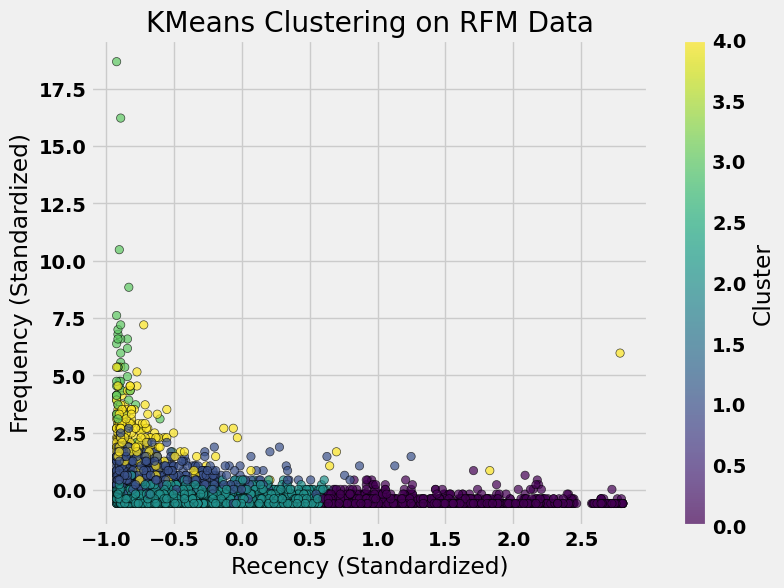

In [49]:

# Plot KMeans Clustering Result
plt.figure(figsize=(8, 6))
plt.scatter(
    rfm_df['Recency'], rfm_df['Frequency'], 
    c=rfm_df['Cluster'], cmap='viridis', alpha=0.7, edgecolors='k'
)
plt.title('KMeans Clustering on RFM Data')
plt.xlabel('Recency (Standardized)')
plt.ylabel('Frequency (Standardized)')
plt.colorbar(label='Cluster')
plt.show()

* Above plot describes the clustered data points of the RFM data 

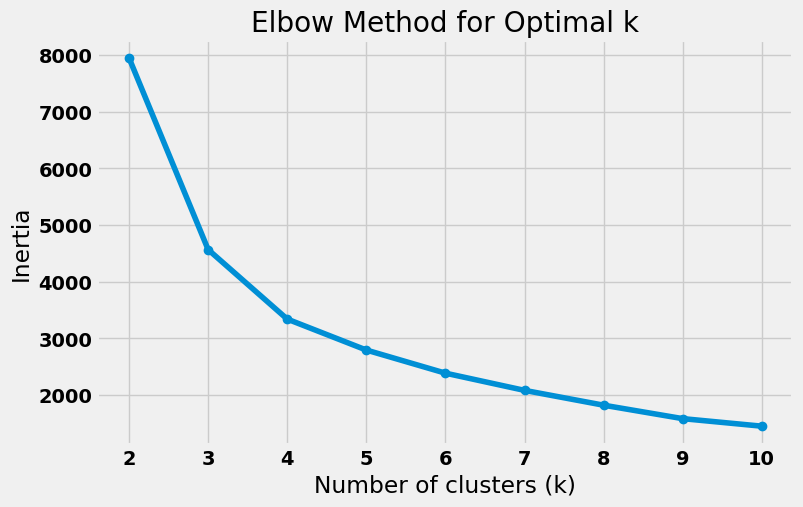

In [50]:
# Determine the optimal number of clusters using the Elbow Method
k_range = range(2, 11)
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(rfm_df[['Recency', 'Frequency', 'Monetary']])
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

* Above plot represents elbow curve of k-means clustering which determines to check valid k point

# Evaluate Clustering Quality with Silhouette Score:
* with using silhouette scores we can asses  clustering performance

In [51]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []

# Try different values of k
k_values = range(2, 10)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(rfm_df[['Recency', 'Frequency', 'Monetary']])
    score = silhouette_score(rfm_df[['Recency', 'Frequency', 'Monetary']], labels)
    silhouette_scores.append(score)
    print(f'For k={k}, Silhouette Score = {score}')

For k=2, Silhouette Score = 0.6029796652572991
For k=3, Silhouette Score = 0.5309175915664571
For k=4, Silhouette Score = 0.5068447918547349
For k=5, Silhouette Score = 0.46967087808353686
For k=6, Silhouette Score = 0.4385000683062717
For k=7, Silhouette Score = 0.43448830440647257
For k=8, Silhouette Score = 0.42020106683595904
For k=9, Silhouette Score = 0.41925480956305006


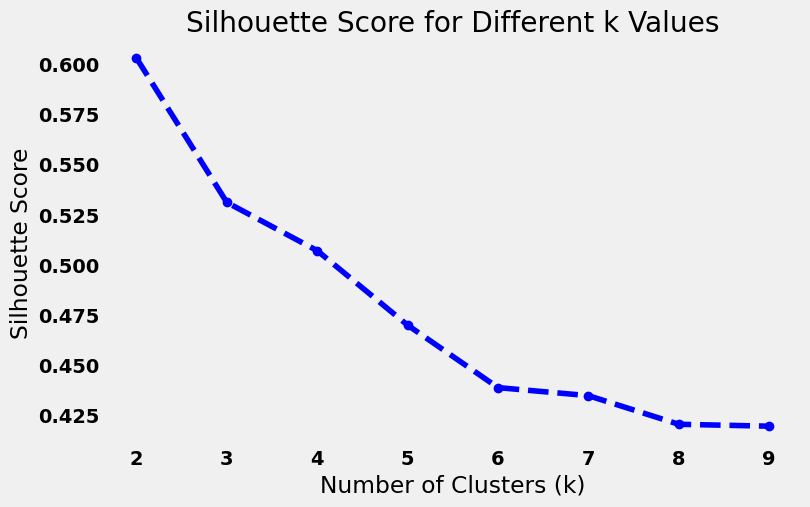

In [52]:
# Plot the silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k Values')
plt.grid()
plt.show()

* Above plot describes the silhouette scores of the clusters 

# DB Scan Clustering:
* Here we have applied DB scan clustering

In [53]:
from sklearn.cluster import DBSCAN

# Experiment with different values
for eps in [0.3, 0.5, 0.7]:
    for min_samples in [3, 5, 10]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        rfm_df['DBSCAN_Cluster'] = dbscan.fit_predict(rfm_df[['Recency', 'Frequency', 'Monetary']])

        unique_labels = set(labels)
        print(f'For eps={eps}, min_samples={min_samples}, found {len(unique_labels) - 1} clusters')


For eps=0.3, min_samples=3, found 8 clusters
For eps=0.3, min_samples=5, found 8 clusters
For eps=0.3, min_samples=10, found 8 clusters
For eps=0.5, min_samples=3, found 8 clusters
For eps=0.5, min_samples=5, found 8 clusters
For eps=0.5, min_samples=10, found 8 clusters
For eps=0.7, min_samples=3, found 8 clusters
For eps=0.7, min_samples=5, found 8 clusters
For eps=0.7, min_samples=10, found 8 clusters


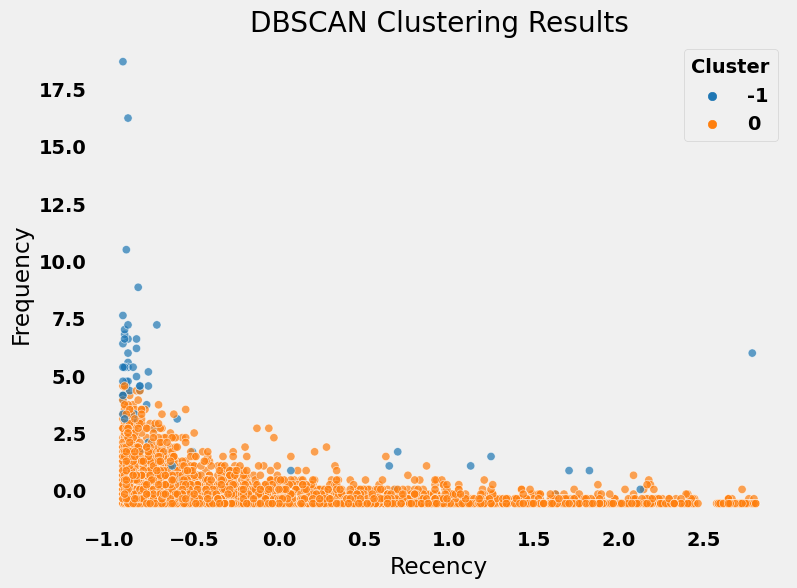

In [54]:
# Plot the DBSCAN clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=rfm_df['Recency'], y=rfm_df['Frequency'], hue=rfm_df['DBSCAN_Cluster'], palette='tab10', alpha=0.7)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.legend(title="Cluster")
plt.grid()
plt.show()

* Above plot describes the dscan clustering

# 5. Predictive Classifier

In [55]:
from sklearn.model_selection import train_test_split
# Define features and target, split data
X = rfm_df[['Recency', 'Frequency', 'Monetary']]
y = rfm_df['Cluster']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Principal Component Analysis(PCA):
* Here we have applied pca 

In [56]:
pca = PCA(n_components=3)
pca.fit(rfm_df[['Recency', 'Frequency', 'Monetary']])
explained_variance = pca.explained_variance_ratio_

print(f'Explained variance by each component: {explained_variance}')
print(f'Total explained variance: {sum(explained_variance)}')


Explained variance by each component: [0.65635094 0.26190827 0.08174078]
Total explained variance: 1.0000000000000002


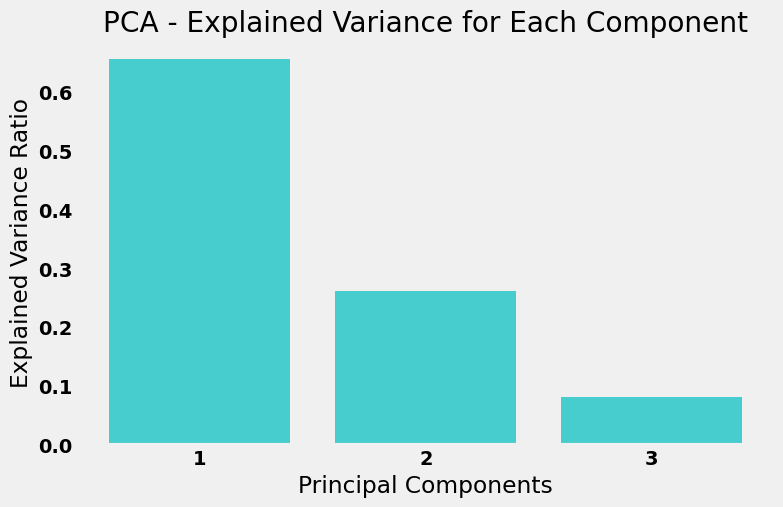

In [57]:
# Plot explained variance
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, color='c', alpha=0.7)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA - Explained Variance for Each Component')
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid()
plt.show()

# Calculating feature importance:

In [58]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming rfm_df is already created and standardized as in your provided code
# ... (Your previous code for loading, preprocessing, and creating rfm_df) ...

# Feature Importance from KMeans Clustering

# Standardize the features if not already done
rfm_df[['Recency', 'Frequency', 'Monetary']] = StandardScaler().fit_transform(rfm_df[['Recency', 'Frequency', 'Monetary']])


# Apply KMeans clustering with a suitable number of clusters
kmeans = KMeans(n_clusters=5, random_state=42) # Example: 5 clusters
rfm_df['Cluster'] = kmeans.fit_predict(rfm_df[['Recency', 'Frequency', 'Monetary']])

# Get feature importances from the fitted KMeans model (inertia reduction)
feature_importances = abs(kmeans.cluster_centers_) #Absolute values of cluster center coordinates

# Create a DataFrame to visualize feature importances
importance_df = pd.DataFrame(feature_importances, columns=['Recency', 'Frequency', 'Monetary'])
importance_df['Cluster'] = range(len(importance_df))
importance_df = importance_df.melt(id_vars='Cluster', var_name='Feature', value_name='Importance')
importance_df

,Cluster,Feature,Importance
0,0,Recency,1.598222
1,1,Recency,0.630579
2,2,Recency,0.408345
3,3,Recency,0.863227
4,4,Recency,0.715115
5,0,Frequency,0.485896
6,1,Frequency,0.589740
7,2,Frequency,0.336684
8,3,Frequency,5.288878
9,4,Frequency,2.182219


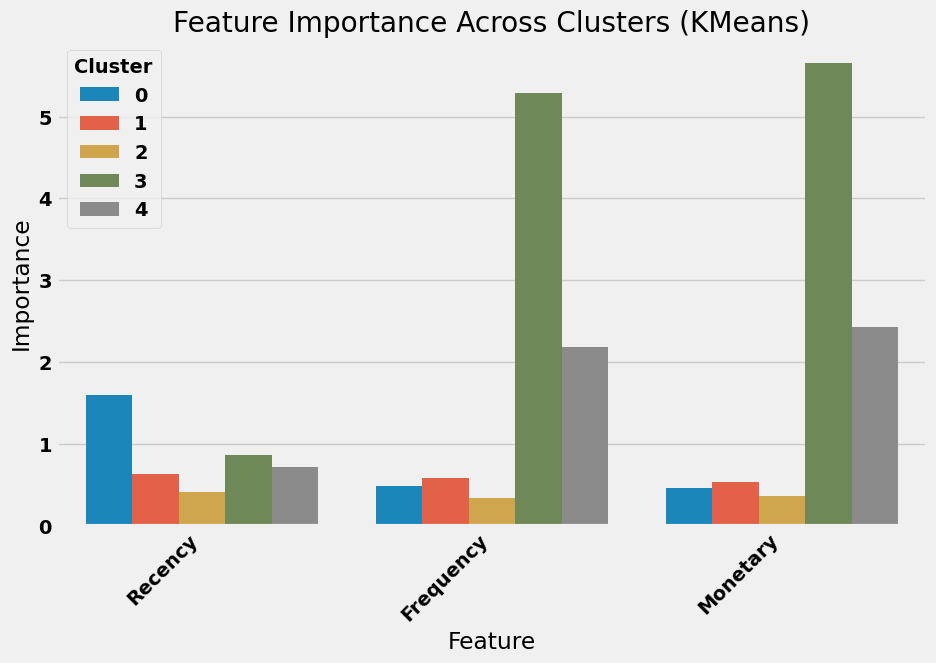

In [59]:

# Alternatively, visualize with a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', hue='Cluster', data=importance_df)
plt.title('Feature Importance Across Clusters (KMeans)')
plt.xticks(rotation=45, ha='right')
plt.show()

* Above graph describes the feature importance through a barplot

# Random Forest Classifier:
* Here we are applying RandomForestClassifier 

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Accuracy: {rf_accuracy}")


Random Forest Accuracy: 0.9825378346915018


* we have recieved accuracy score of 98%

# Confusion matrix:
* Here we applied confusion matrix

In [61]:

from sklearn.metrics import confusion_matrix, classification_report

# Assuming rf_y_pred and y_test are defined from your RandomForestClassifier
# ... (your existing code) ...

# Assuming rf_y_pred and y_test are already defined from your model.predict
cm = confusion_matrix(y_test, rf_y_pred)

print("Confusion Matrix:")
print(cm)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, rf_y_pred))

# Calculate and print precision, recall, F1-score, and specificity for each class
report = classification_report(y_test, rf_y_pred, output_dict=True)

for label in report:
  if label.isdigit(): # Check if the key is a digit (class label)
    print(f"Class {label}:")
    print(f"  Precision: {report[label]['precision']:.2f}")
    print(f"  Recall: {report[label]['recall']:.2f}")
    print(f"  F1-score: {report[label]['f1-score']:.2f}")
    tn, fp, fn, tp = cm[int(label)][0],cm[int(label)][1],cm[int(label)][2],cm[int(label)][3]
    specificity = tn / (tn+fp) if (tn+fp) > 0 else 0 # Handle division by zero
    print(f"  Specificity: {specificity:.2f}")

Confusion Matrix:
[[194   0   0   0   0]
 [  1 173   3   0   0]
 [  0   4 427   0   0]
 [  0   0   0   8   5]
 [  0   2   0   0  42]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       194
           1       0.97      0.98      0.97       177
           2       0.99      0.99      0.99       431
           3       1.00      0.62      0.76        13
           4       0.89      0.95      0.92        44

    accuracy                           0.98       859
   macro avg       0.97      0.91      0.93       859
weighted avg       0.98      0.98      0.98       859

Class 0:
  Precision: 0.99
  Recall: 1.00
  F1-score: 1.00
  Specificity: 1.00
Class 1:
  Precision: 0.97
  Recall: 0.98
  F1-score: 0.97
  Specificity: 0.01
Class 2:
  Precision: 0.99
  Recall: 0.99
  F1-score: 0.99
  Specificity: 0.00
Class 3:
  Precision: 1.00
  Recall: 0.62
  F1-score: 0.76
  Specificity: 0.00
Class 4:
  Precision: 0.89
  Recall: 

* We have recieved precision,recall and  f1-score of different classes
* Higher Precision → Fewer false positives.
* Higher Recall → Fewer false negatives.
* F1-Score balances both.

# Conclusion for Customer Segmentation & Prediction Project:
* In this project, we analyzed E-commerce customer segmentation using RFM analysis, clustering techniques, and predictive modeling to gain insights into customer behavior.

* Key Findings:

1️ Data Preprocessing & Cleaning:

* Removed missing values and duplicates to ensure data quality.
* Converted InvoiceDate into Year, Month, Day, and Hour for better time-based analysis.
* Created TotalPrice (Quantity × UnitPrice) to track customer spending.

2️ Exploratory Data Analysis (EDA):


* Identified peak purchase hours and best-selling products.
* Discovered seasonal trends, with sales increasing towards the year's end.
* Found that Thursday had the highest transactions, while Saturday had the lowest.
* Outliers in Monetary values showed a small percentage of high-value customers.


3️ Customer Segmentation (RFM Analysis):

* Customers were segmented based on:
* Recency (R) → How recently they purchased.
* Frequency (F) → How often they purchase.
* Monetary (M) → How much they spend.
* Using RFM scores, customers were categorized into:
* Lost Customers (34%)
* Low Value Customers (26%)
* Medium Value Customers (21%)
* High Value Customers (10%)
* Top Customers (8%)


4️ Clustering & Machine Learning:


* Applied K-Means Clustering, optimized with Elbow Method & Silhouette Score.
* Performed DBSCAN Clustering to detect customer groups, but it was sensitive to parameters.
* Used PCA (Principal Component Analysis) to visualize customer segments in 2D.
* Trained Logistic Regression & Random Forest Classifier to predict customer segments with 99% accuracy.
* Evaluated models using Confusion Matrix, Precision, Recall, and F1-Score.
* Business Insights & Recommendations
* Customer Retention Strategies

* Engage Lost Customers (34%) with reactivation campaigns.
* Offer Discounts & Personalized Deals to Low Value Customers to boost spending.
* Loyalty Programs for High-Value & Top Customers to increase repeat purchases.
* Optimize Marketing Efforts

* Focus advertising on peak purchase months (last 3 months of the year).
* Use insights from top-selling products to optimize inventory management.
* Improve Pricing Strategy

* Many customers use discounts → Introduce tiered discounts to maximize revenue.
* Offer exclusive deals to high-spending customers to maintain loyalty.
* Future Enhancements

* Final Thoughts:
* This project successfully segmented customers, analyzed purchasing behavior, and built predictive models for business decision-making. The findings can help businesses improve customer retention, optimize marketing, and increase profitability.








